<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52702 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52702 non-null  object
dtypes: object(2)
memory usage: 823.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 52686 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52686 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


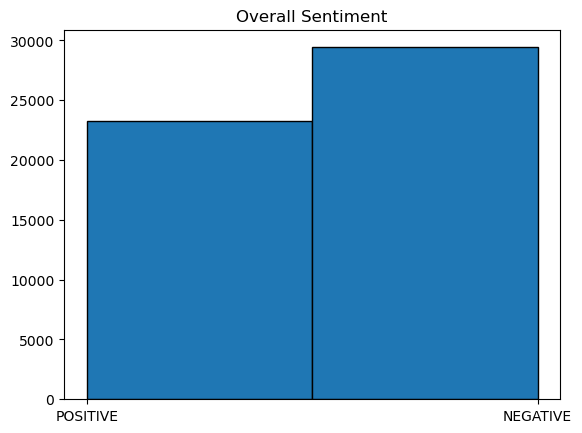

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rhseb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\rhseb/nltk_data'
    - 'C:\\Users\\rhseb\\anaconda3\\nltk_data'
    - 'C:\\Users\\rhseb\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\rhseb\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\rhseb\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [39]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

#Loading The Dataset
df = pd.read_csv('SpotifyReviewsData.csv')

#Seeing The Data
df.head(10)

#Basic EDA
df.info()

#Identifying Null Reviews
df.isnull().sum()

#Removing Null Reviews
df = df.dropna(subset=['Review'])
df.info()

#Showing The Overall Sentiment
x = df['label']
plt.hist(x, bins=2, edgecolor='black')
plt.title("Overall Sentiment")
plt.show()

#Removing Stop Words
def clean_text(text):
    text = re.sub(r'Ã[\x80-\xBF]+', ' ', text) 
    text = re.sub(r'[^a-zA-Z\s]', ' ', text) 
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()

df['Review'] = df['Review'].apply(clean_text)

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenize_text(text):
    tokens = word_tokenize(text) 
    return tokens  

df['Tokens'] = df['Review'].apply(tokenize_text)

from nltk.corpus import stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    if custom_stopwords:
        stop_words.update(custom_stopwords)
    return [word for word in tokens if word.lower() not in stop_words]

df['Filtered_Tokens'] = df['Tokens'].apply(remove_stopwords)

from collections import Counter 
all_filtered_tokens = [word for tokens in df['Filtered_Tokens'] for word in tokens]
word_counts_after_removal = Counter(all_filtered_tokens)
most_common_words_after_removal = word_counts_after_removal.most_common(20)
print(most_common_words_after_removal)

from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word, pos='v') for word in tokens]

df['Lemmatized_Tokens'] = df['Filtered_Tokens'].apply(lemmatize_tokens)

from sklearn.feature_extraction.text import TfidfVectorizer

#performing TF-IDF vectorization
def apply_tfidf(df):
    df['TFIDF_Tokens'] = df['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['TFIDF_Tokens'])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    return tfidf_matrix, feature_names

# Applying TF-IDF on our Dataframe
tfidf_matrix, feature_names = apply_tfidf(df)
df.head(10)